Today's *Package-of-the-Week* is probably one that most of you have already encountered before. However, to setup for next week's pacakge, I want to do a brief introduction to it just in case. 
Here is the setup:
Anaconda build of Python 2.7/3.x
**or**
Python 2.7/3.x
pip install numpy
pip install matplotlib
pip install pandas

That's right, our package is **PANDAS**. For anyone that regularly uses R, pandas will make you feel right at home. However, since we are operating in a Python environment, it may take a little bit to change your mindset from a Numpy one to a Pandas one. Just like FORTRAN, C/C++, and native R, Pandas is a *column-based* architecture. Unlike Numpy, Pandas allows for column & row names (this is the big similarity to R). Whereas Numpy uses `np.array`s, Pandas used `pd.DataFrame`s. This right here should also make R users feel a little bit more at home. The fun thing about Pandas is that it kind of ties both the R world and the Numpy world together. It acts and feels like R, but operates on a Numpy backend. Furthermore, it introduces an easier way to inject `NaN` values into your data, because we all know that 0 is not a suitable number for missing values. 

In [1]:
# Our dependencies for this intro
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df1 = pd.DataFrame( [[2.7,3.2,0.8],[np.nan, 17.6, 5.1]], index = ['a','b'], columns = ['1', '2','3'], dtype = 'float64')
df1

,1,2,3
a,2.7,3.2,0.8
b,NaN,17.6,5.1


First, just like R, you *do not* have to initialize with index and column names. However, as seen above, you can specify them if you want. Second, you may have noticed the `dtype` parameter. While Python is a strongly typed language, setting your `DataFrame` to a specific type can help enforce standards in your data. If you have accidentally concatenated a row of string number into a really long string number instead of summing them up, you know what I mean. However, you *do not* have to use `dytpe` in your initialization if you do not want to. `DataFrames` are *dynamically* typed by **column**. Unlike Numpy, column 1 can be strings, while column 2 can be floats, while column 3 can be integers. You do not have to have the same datatype throughout the whole `DataFrame`.

In [30]:
df2 = pd.DataFrame([['test', int(7), float(2/3)], ['best', int(100), float(3.14)]])
df2

,0,1,2
0,test,7,0.666667
1,best,100,3.140000


Taking the above example, I can go back and add in the column and index(row) names later, if I want.

In [31]:
df2.columns = ['a','b','c']
df2

,a,b,c
0,test,7,0.666667
1,best,100,3.140000


The reason for naming columns is just like in R. I can now call on those columns specifically.

In [32]:
print(df2.b)

0      7
1    100
Name: b, dtype: int64


And it lets you slice through the dataset a little easier. Slicing `DataFrames` was actually one of the first stumbling blocks for me. There are essentially 3 ways to do it:

In [37]:
df2.b # we have already seen this

0      7
1    100
Name: b, dtype: int64

In [38]:
df2.loc[1, 'b':'c']

b     100
c    3.14
Name: 1, dtype: object

The `.loc` method allows slicing on column names. THis is helpful if you want to pull out a specific subset of columns (e.g. certain BAM files)

In [39]:
df2.ix[:,0:2]

      a    b
0  test    7
1  best  100


The `.ix` method allows for slicing on string name or index number. This is helpful if you want a subset of the data, but it is too large to know specific column names or you have not named the columns logically (e.g. all rows after the BED region)

However, you can always subset the data in a more heuristic fashion by using conditions. This method is very similar to R & MATLAB.

In [46]:
# Making a bigger DataFrame to help visualize the above point
dfBig = pd.DataFrame(np.random.randn(17,12))
dfBig[dfBig > 0]

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,0.199613,NaN,NaN,NaN,0.672369,0.014872,NaN,1.165672,1.167680,NaN,NaN
1,NaN,NaN,NaN,0.479778,NaN,NaN,0.793882,1.053494,0.358845,NaN,NaN,NaN
2,NaN,NaN,0.466514,NaN,0.392564,NaN,NaN,NaN,NaN,0.016407,0.125013,NaN
3,1.065329,0.761578,1.411689,NaN,NaN,0.078112,0.987842,0.706774,1.142488,NaN,NaN,0.422783
4,0.170736,0.986005,NaN,1.996517,NaN,0.184788,0.251123,1.025817,NaN,NaN,NaN,NaN
5,0.017775,1.044958,1.629828,NaN,0.781419,NaN,NaN,NaN,NaN,NaN,0.909923,1.480481
6,0.742156,NaN,NaN,0.110549,NaN,NaN,NaN,NaN,1.324470,NaN,0.952122,0.602388
7,0.044793,0.884929,NaN,NaN,NaN,0.275956,0.883193,NaN,1.108868,NaN,0.525370,NaN
8,NaN,0.814576,NaN,NaN,0.840941,0.529366,0.916085,0.337038,NaN,NaN,0.680907,NaN
9,NaN,0.902647,0.788422,NaN,NaN,NaN,1.014236,NaN,NaN,0.040980,NaN,1.208247


Now, one of the **BEST** things about pandas is its ability to read in large files very easily. No more writing a function just to read in a file. Furthermore, it allows for any type of delimiter or EOL character, and will even read in column headers and indices if requested. Given a tab-delimited file, loading the file into the `DataFrame` is a one-liner:

In [48]:
# Not going to run this since this file doesn't exist
# When GitHub compiles this, it will look like an error
example = pd.read_csv('example_file.tab', delimiter = "\t")

Now comes the fun computation part. Again, these methods operate just like R or Numpy.

In [51]:
dfBig.sum(axis=1).mean() # sum across the row, then take the mean of the sums

-0.6652359406726769

Furthermore, plotting is crazy easy if you import `matplotlib` (which is historically difficult to initialize at first). For example:

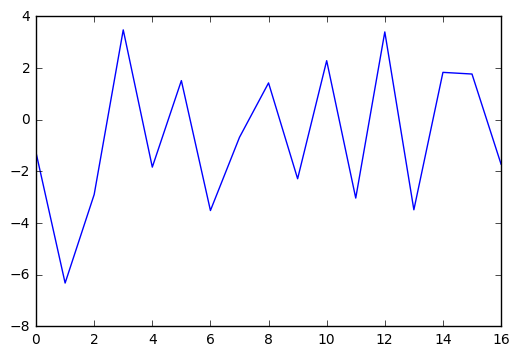

In [54]:
dfBig.sum(axis=1).plot()
plt.show()

Hopefully, this may not seem like a *huge* change in regular data wrangling, and makes some things *much* easier. However, the broadcasting capability of Pandas will be **fully** utilized in next week's package.